In [1]:
import numpy as np
import pandas as pd

from models.kmeans import *
from models.regression import *
from models.knn import *
from models.plotting import *
from models.data_gen import *

## Linear Regression

In [2]:
data_loader = SampleData(n_samples=10000, n_attr=3)
x_data, y = data_loader.linear_reg_data()

reg = LinearRegression(x_data.drop("x0", axis=1), y, True)
reg.fit(eta=0.01, verbose=250, epochs=1500, decay_f=1.5, lr_update=250)

Epoch: 0; MSE: 296.5699
Learning updated to 0.007 at Epoch: 0

Epoch: 250; MSE: 0.1807
Learning updated to 0.004 at Epoch: 250

Epoch: 500; MSE: 0.146
Learning updated to 0.003 at Epoch: 500

Epoch: 750; MSE: 0.1302
Learning updated to 0.002 at Epoch: 750

Epoch: 1000; MSE: 0.1219
Learning updated to 0.001 at Epoch: 1000

Epoch: 1250; MSE: 0.1173
Learning updated to 0.001 at Epoch: 1250



In [3]:
reg.beta, data_loader.true_beta

(array([2.18170738, 0.41845886, 2.7590671 , 1.2272319 ]),
 array([2.14958503, 0.38814374, 2.72681416, 1.25762562]))

## K-Means Clustering

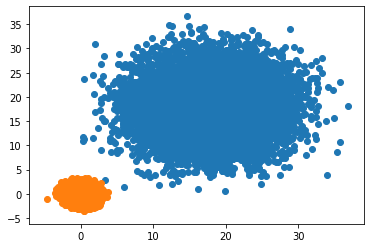

In [2]:
n_cluster1 = 10000
n_cluster2 = 5000

n_attr = 2

cols = ["x" + str(i) for i in range(n_attr)]
x_data = pd.concat([
    pd.DataFrame(np.random.randn(n_cluster1, n_attr) * 5 + 18, columns=cols).assign(cluster=0),
    pd.DataFrame(np.random.randn(n_cluster2, n_attr), columns=cols).assign(cluster=1)
])

clusters = x_data.cluster

plt_clusters(x_data)

In [4]:
clf = KMeans(x_data.drop("cluster", axis=1, errors="ignore"))
clf.fit(n_clusters=2, verbose=50, plots=False)

[[13.38671169 15.46340042]
 [ 8.85525441  4.32808564]]
Converged after 5 iterations!

[[18.02043197 18.04074981]
 [ 0.08411374  0.09508174]]


In [6]:
clf.c_centres, x_data.groupby("cluster").mean().values

(array([[ 0.06977699,  0.05045589],
        [18.01819832, 18.03410984]]), array([[17.9641059 , 17.97374386],
        [-0.02306047, -0.03022906]]))

## Classification

In [7]:
n_samples = 2500
n_classes = 2

n_attr = 2
k = 5

cols = ["x" + str(i) for i in range(n_attr)]
x_data = pd.concat([
    pd.DataFrame(np.random.randn(int(n_samples), n_attr)
                 * 6 + 12.5, columns=cols).assign(labels=0),
    pd.DataFrame(np.random.randn(int(n_samples / 10), n_attr),
                 columns=cols).assign(labels=1)
])

labels = x_data.labels

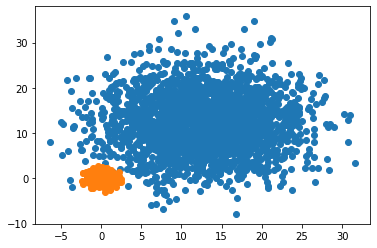

In [8]:
plt_classes(x_data, cols)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.33)

reg = kNNRegressor(x_data=x_train, y=y_train)
reg.predict(x_test=x_test, k=5, weighted=True)

n_samples = 2500
n_classes = 2

n_attr = 2
k = 5

cols = ["x" + str(i) for i in range(n_attr)]
x_data = pd.concat([
    pd.DataFrame(np.random.randn(int(n_samples), n_attr)
                 * 6 + 12.5, columns=cols).assign(labels=0),
    pd.DataFrame(np.random.randn(int(n_samples / 10), n_attr),
                 columns=cols).assign(labels=1)
])

labels = x_data.labels

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data.drop("labels", axis=1), labels, test_size=0.33)

clf = kNNClassifer(x_train, labels=y_train)
np.sum((clf.predict(x_test, k=5, weighted=False) == y_test.values)) / len(y_test)


dist_df = cdist(x_test.values, x_train.values, metric="euclidean")
neighbors = np.argpartition(dist_df, kth=k, axis=1)[:, :k]

weights = np.take_along_axis(dist_df, neighbors, axis=1)
weights = np.round(np.divide(
    (weights ** -2), np.sum(weights ** -2, axis=1).reshape(-1, 1)) * 100, 1)
